In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
hcare = pd.read_excel("1645792390_cep1_dataset.xlsx")
hcare.head()
                      

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# PRELIMINARY ANALYSIS

In [4]:
hcare.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
hcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


CHECKING FOR DUPLICATE VALUES

In [6]:
hcare.duplicated().value_counts

<bound method IndexOpsMixin.value_counts of 0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool>

In [7]:
hcare.duplicated().value_counts()

False    302
True       1
dtype: int64

REMOVING DUPLICATES

In [8]:
hcare.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
hcare.duplicated().value_counts()

False    302
True       1
dtype: int64

In [10]:
hcare[hcare.duplicated(['age','sex','cp','trestbps','chol','restecg','thalach','exang','oldpeak','slope','ca'],keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [11]:
df = hcare.drop_duplicates()

In [12]:
df.duplicated().value_counts()

False    302
dtype: int64

CHECK FOR MISSING VALUES

In [13]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below: 

a. Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data. 

In [14]:
df.mean()

age          54.420530
sex           0.682119
cp            0.963576
trestbps    131.602649
chol        246.500000
fbs           0.149007
restecg       0.526490
thalach     149.569536
exang         0.327815
oldpeak       1.043046
slope         1.397351
ca            0.718543
thal          2.314570
target        0.543046
dtype: float64

In [15]:
df.median()

age          55.5
sex           1.0
cp            1.0
trestbps    130.0
chol        240.5
fbs           0.0
restecg       1.0
thalach     152.5
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

In [16]:
df.mode()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58.0,1.0,0.0,120.0,197,0.0,1.0,162.0,0.0,0.0,2.0,0.0,2.0,1.0
1,NaN,NaN,NaN,NaN,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


b. Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot.

In [17]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


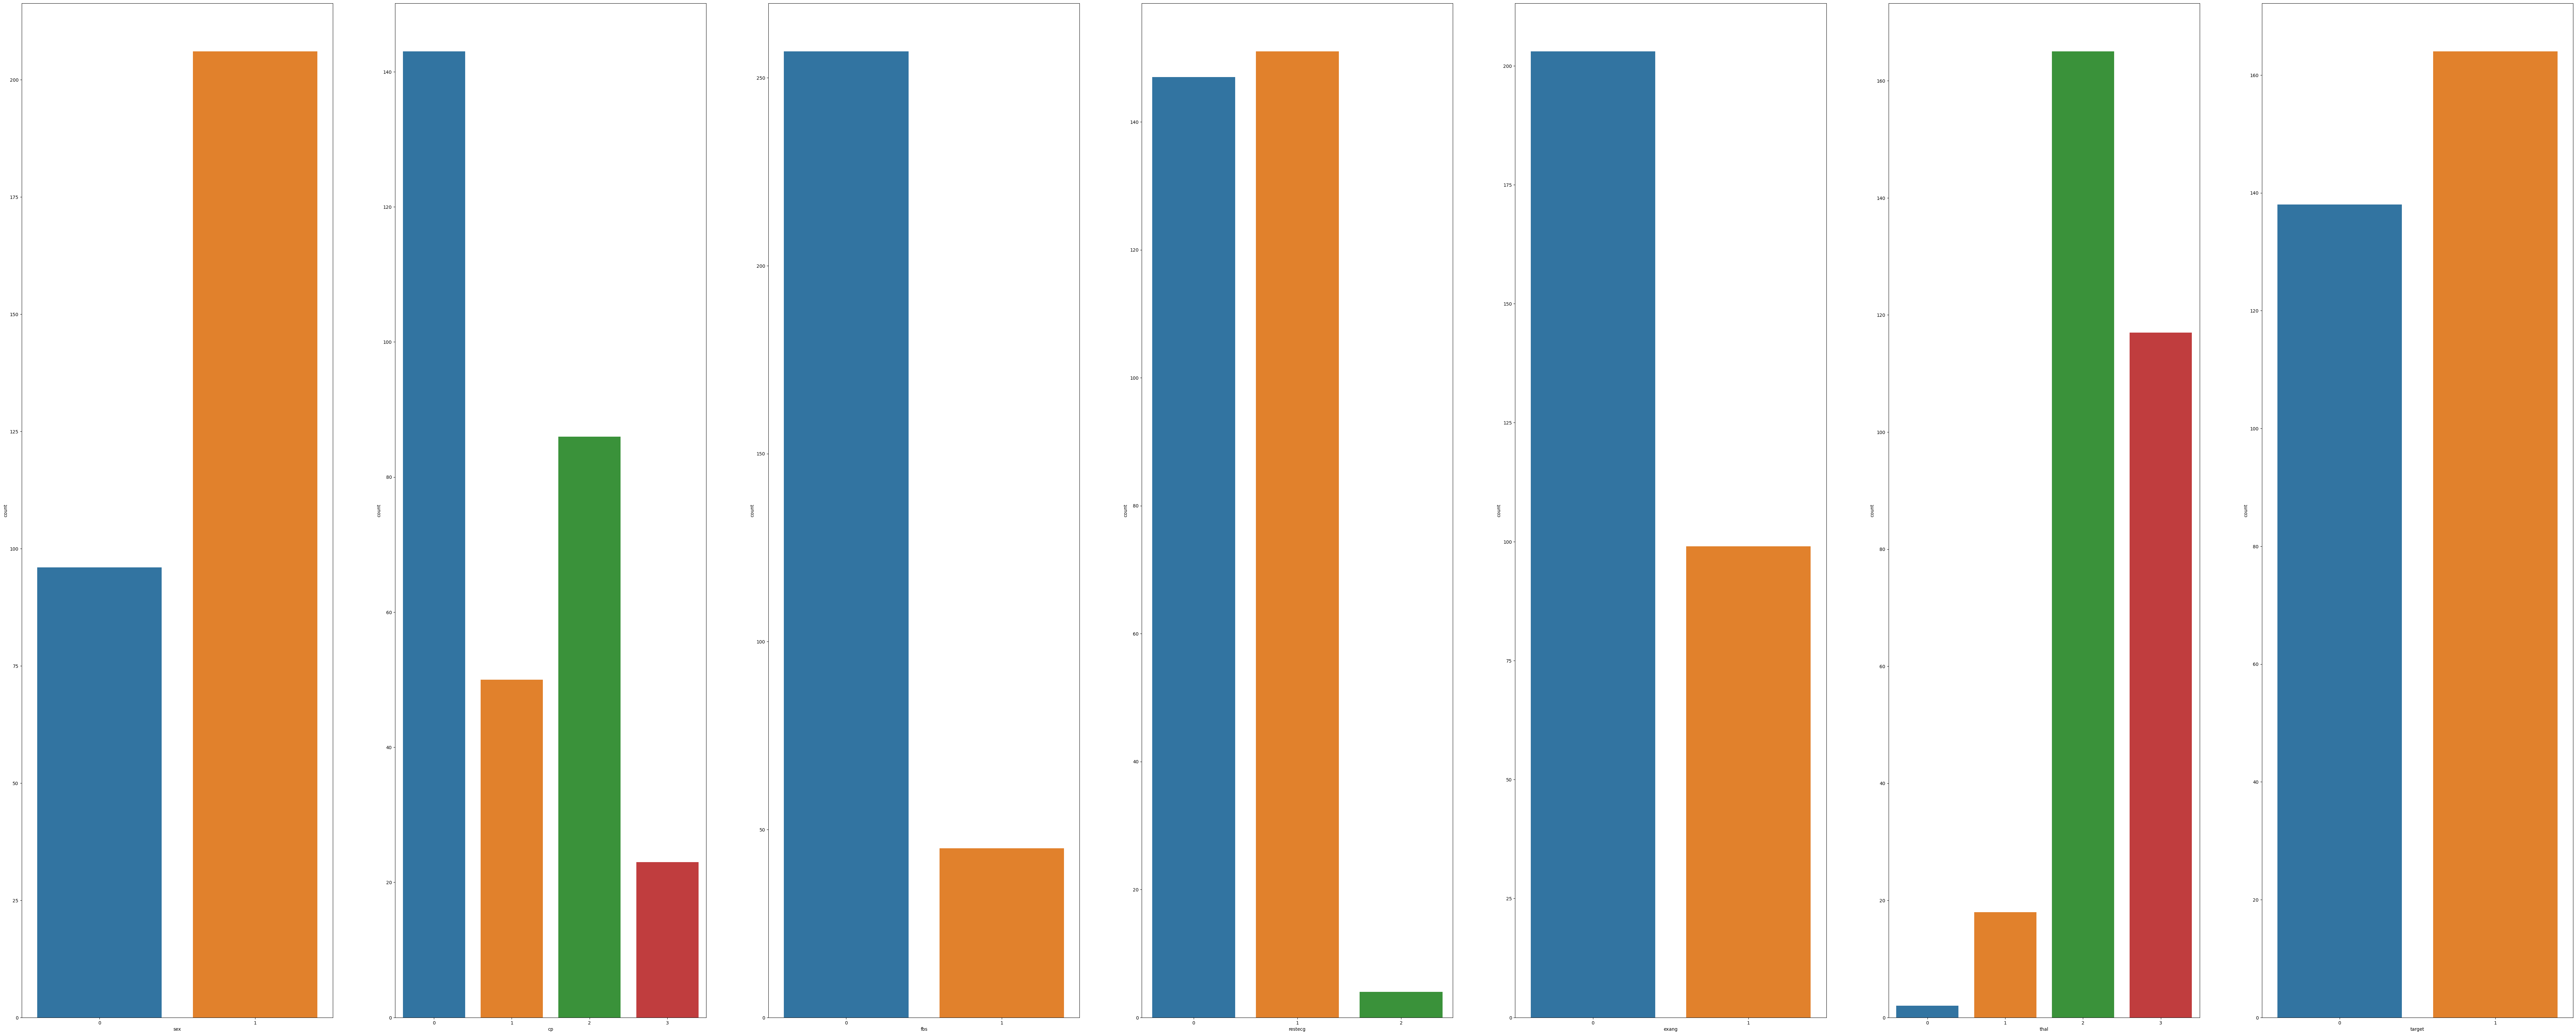

In [19]:
fig , ax = plt.subplots( 1, 7, figsize = (100,40))
sns.countplot(df["sex"], ax=ax[0])
sns.countplot(df["cp"], ax=ax[1])
sns.countplot(df["fbs"], ax=ax[2])
sns.countplot(df["restecg"], ax=ax[3])
sns.countplot(df["exang"], ax=ax[4])
sns.countplot(df["thal"], ax=ax[5])
sns.countplot(df["target"], ax=ax[6])
plt.show()


c. Study the occurrence of CVD across the Age category. 

In [20]:
#df.head()

In [21]:
bins = [20,40,60,80]
labels= ['Adult','Middle Age Adult','Senior Adult']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,AgeGroup
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Senior Adult
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Middle Age Adult
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Middle Age Adult
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Middle Age Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,Middle Age Adult
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,Middle Age Adult
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,Senior Adult
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,Middle Age Adult


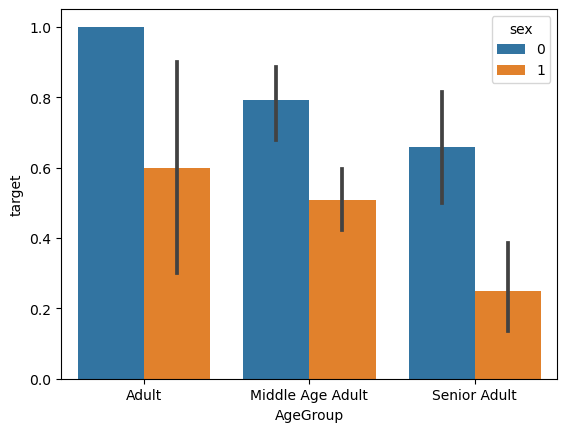

In [22]:
sns.barplot(x='AgeGroup', y='target', hue='sex', data=df)
plt.show()

d. Study the composition of all patients with respect to the Sex category

In [23]:
df['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

In [24]:
df.groupby(by='sex').mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.125000,0.572917,151.12500,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,53.834951,0.927184,130.912621,239.601942,0.160194,0.504854,148.84466,0.373786,1.120874,1.383495,0.796117,2.402913,0.446602


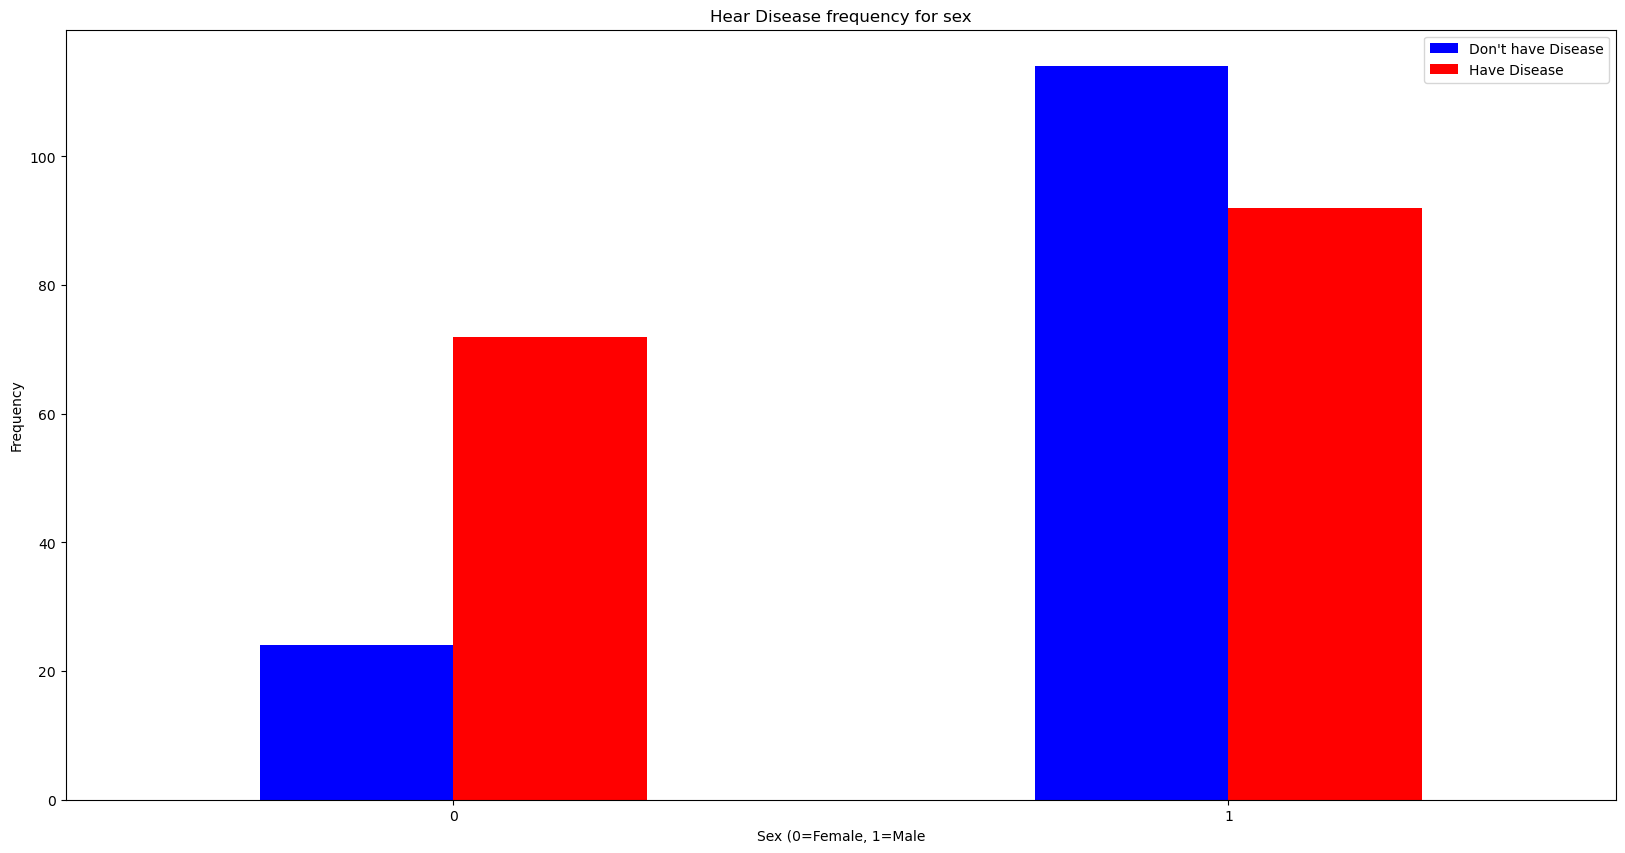

In [25]:
crosstb = pd.crosstab(df.sex, df.target)
crosstb.plot(kind = 'bar', figsize=(20,10), color=['blue','red'])
plt.title('Hear Disease frequency for sex')
plt.xlabel('Sex (0=Female, 1=Male')
plt.ylabel('Frequency')
plt.legend(["Don't have Disease", "Have Disease"])
plt.xticks(rotation=0)
plt.show()
        

e. Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

In [26]:
df['trestbps'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

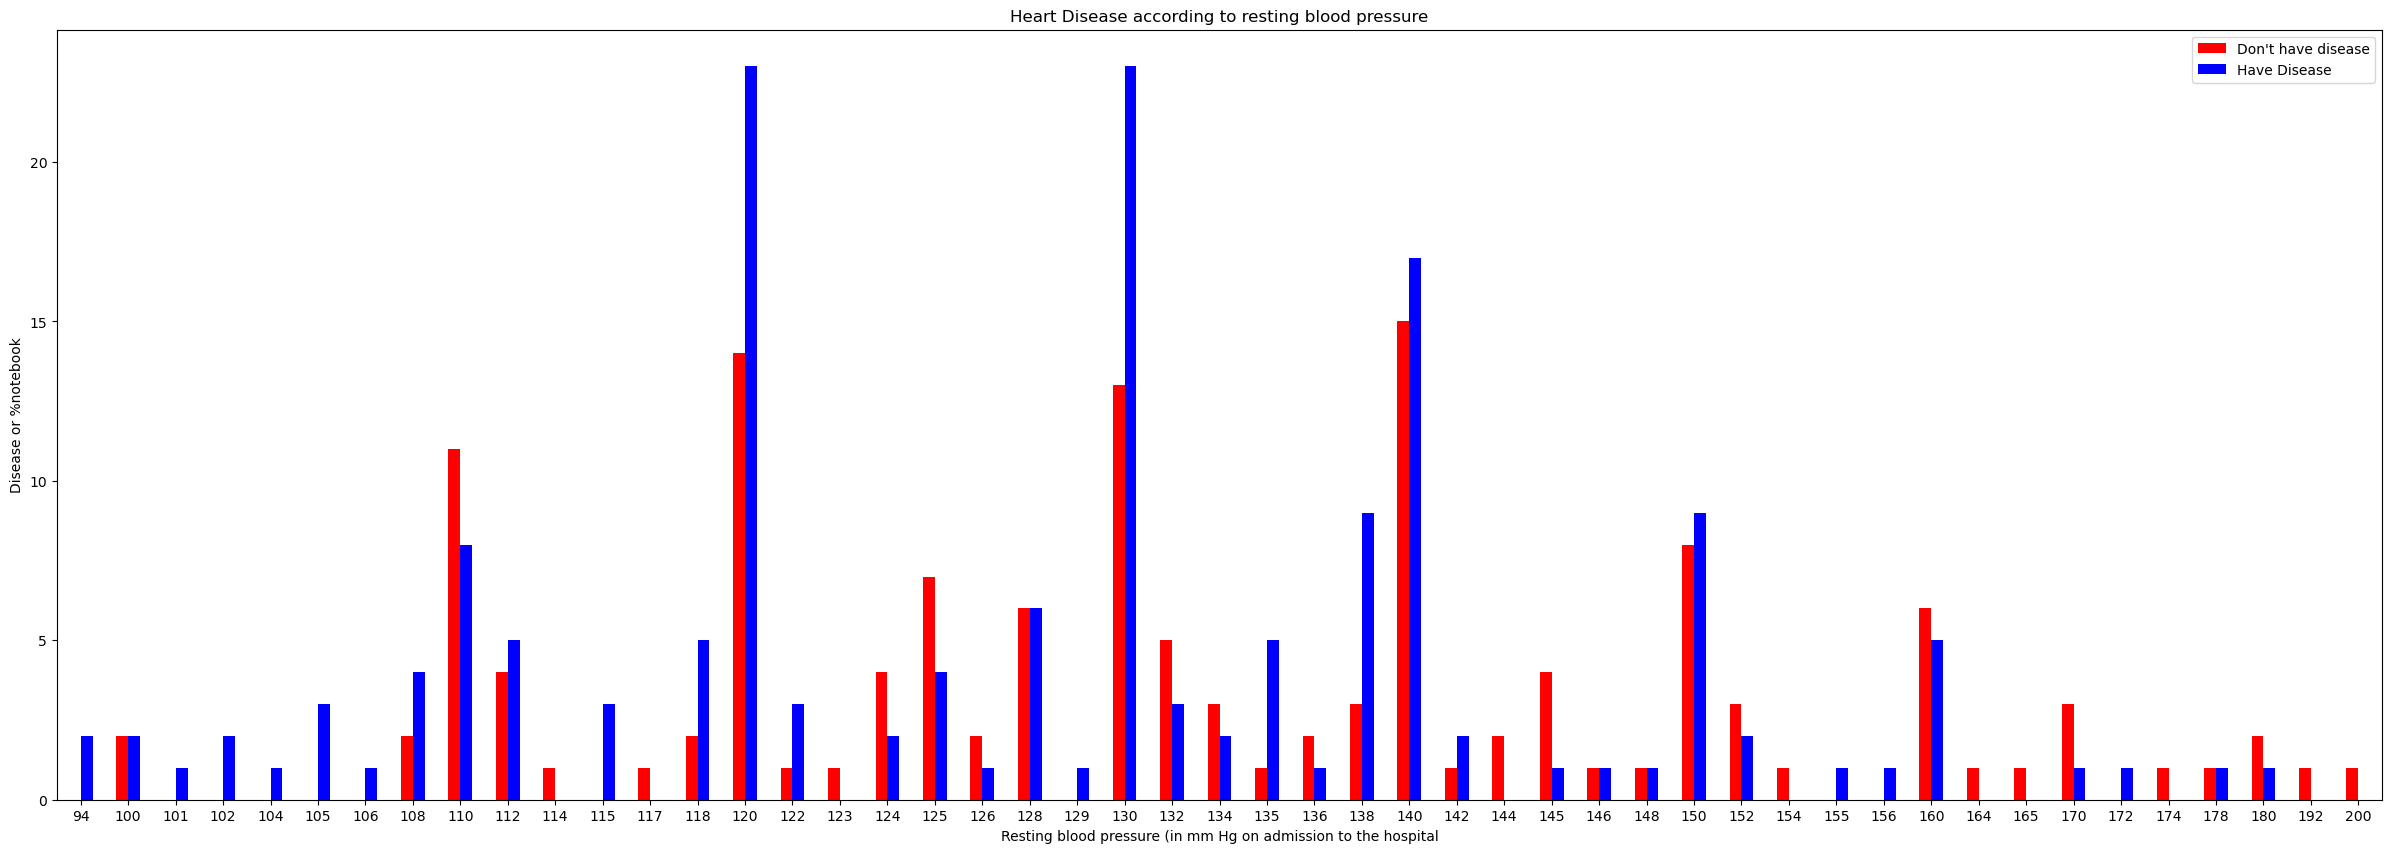

In [27]:
crosstb1 = pd.crosstab(df.trestbps, df.target)
crosstb1.plot(kind='bar', figsize=(30,10), color=['red','blue'])
plt.title('Heart Disease according to resting blood pressure')
plt.xlabel('Resting blood pressure (in mm Hg on admission to the hospital')
plt.ylabel('Disease or %notebook')
plt.legend(["Don't have disease","Have Disease"])
plt.xticks(rotation=0)
plt.show()

f. Describe the relationship between cholesterol levels and a target variable

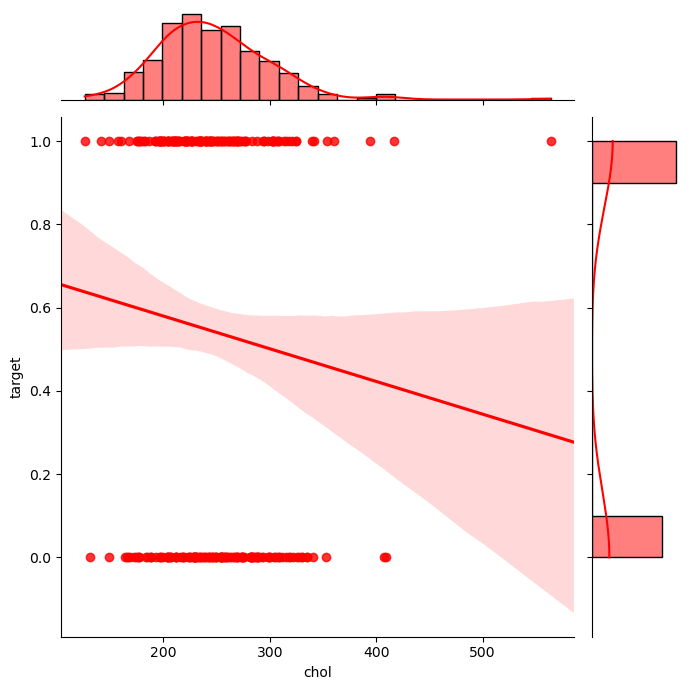

In [28]:
ax = sns.jointplot('chol','target', data=df, kind='reg', truncate=False, color='red', height=7)
plt.show()

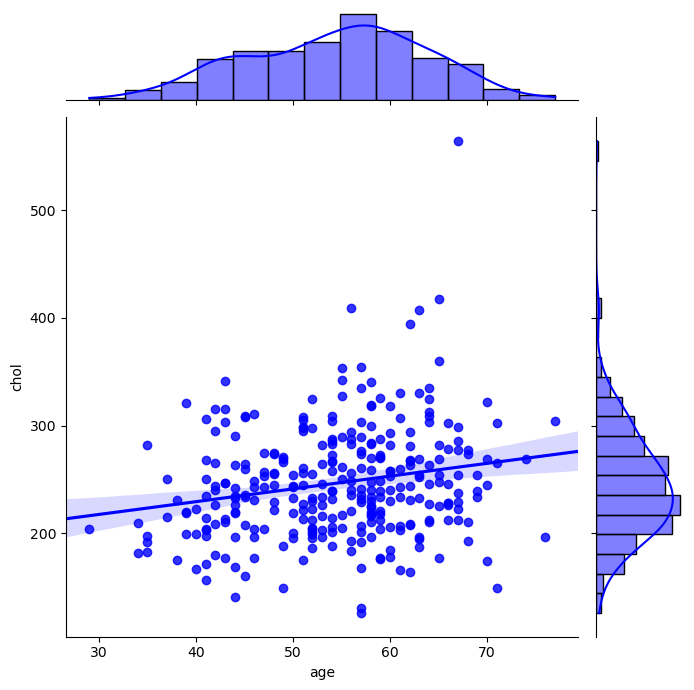

In [29]:
ax = sns.jointplot('age','chol', data=df, kind='reg', truncate=False, color='blue', height=7)
plt.show()

g. State what relationship exists between peak exercising and the occurrence of a heart attack

In [30]:
df['slope'].unique()

array([0, 2, 1], dtype=int64)

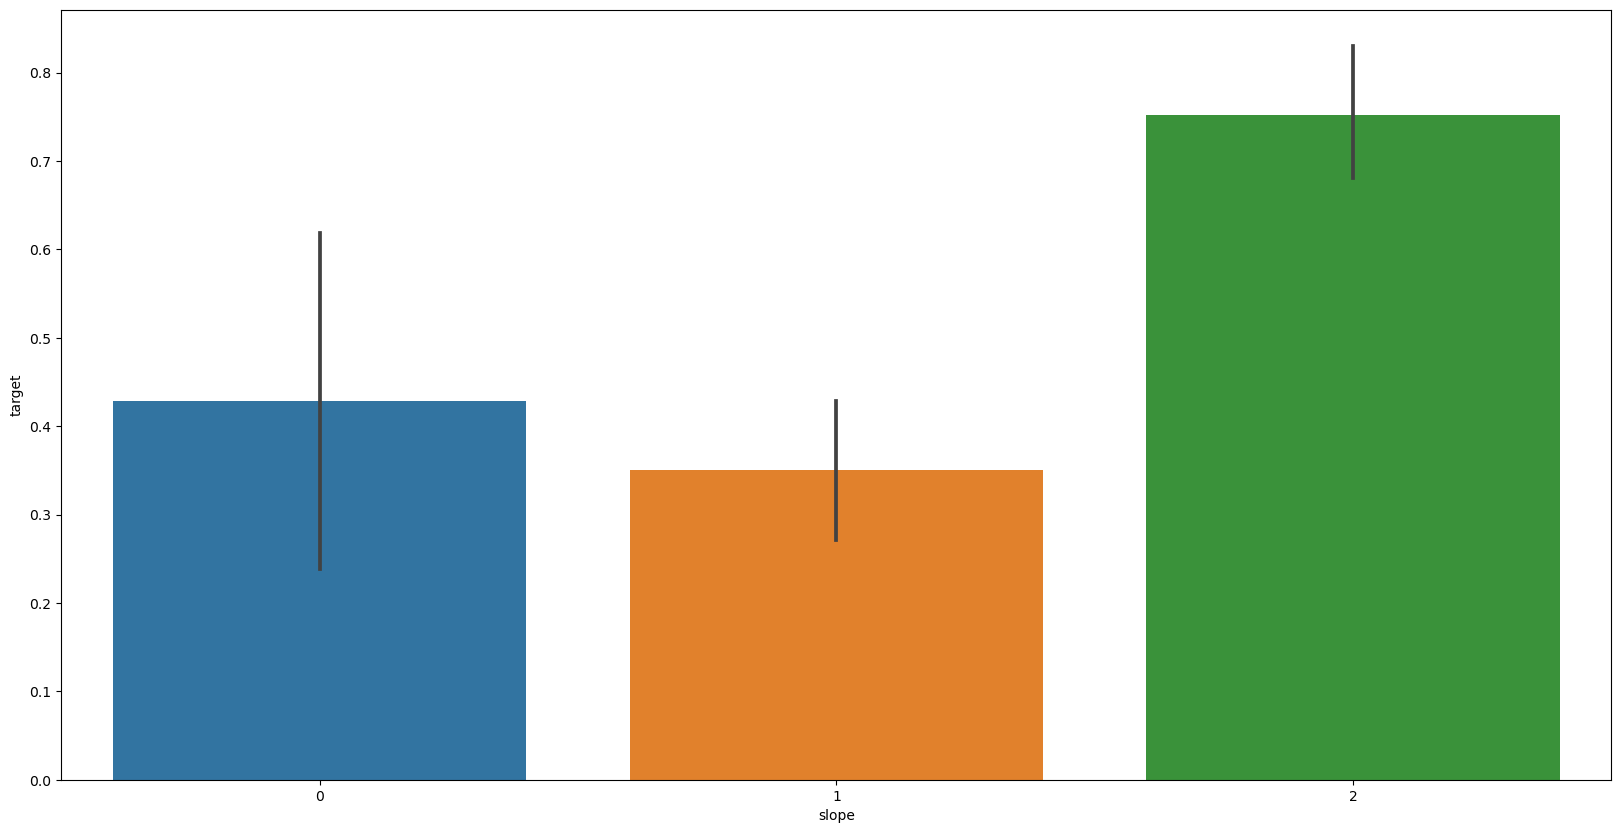

In [31]:
plt.figure(figsize=(20,10))
sns.barplot(df['slope'],df['target'])
plt.show()

h. Check if thalassemia is a major cause of CVD

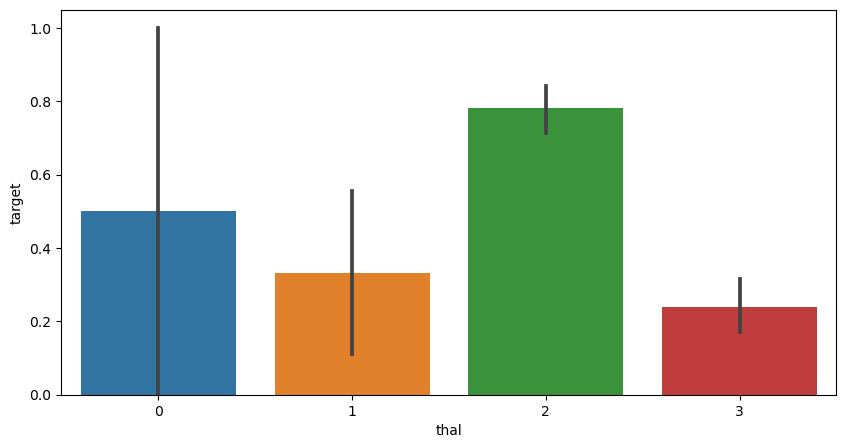

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(df['thal'],df['target'])
plt.show()

i. List how the other factors determine the occurrence of CVD

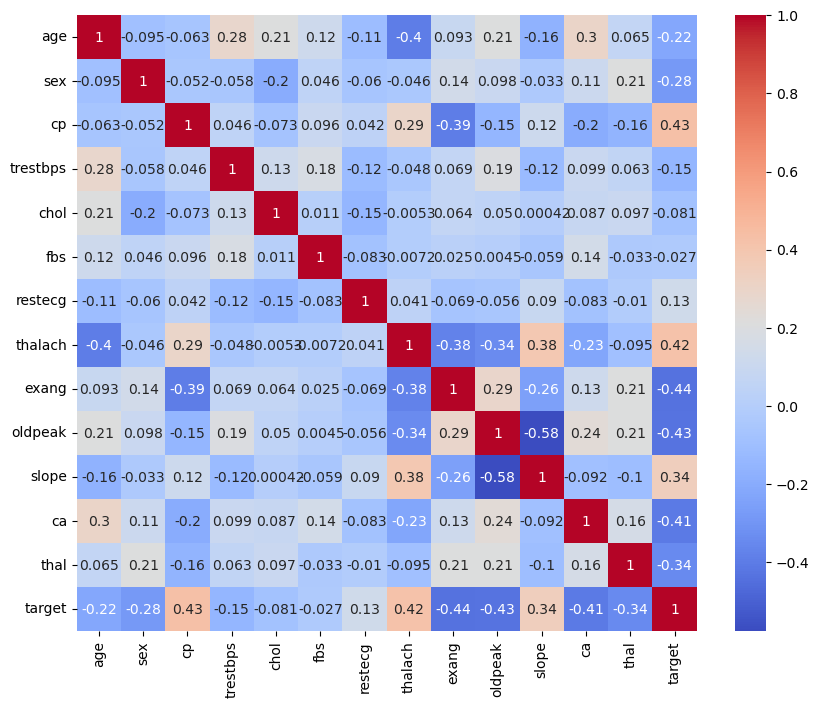

In [33]:
fig,ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(df.corr(), cmap='coolwarm', fmt='.2g', annot=True)
plt.show()

In [34]:
continuous = [('trestbps', 'blood pressure in mm Hg'), 
              ('chol', 'serum cholestoral in mg/d'), 
              ('thalach', 'maximum heart rate achieved'), 
              ('oldpeak', 'ST depression by exercise relative to rest'), 
              ('ca', '# major vessels: (0-3) colored by flourosopy')]

In [35]:
def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(df[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='target', y=attribute, data=df, ax=axes[ax_index][1])

In [36]:
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)] 
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)] 

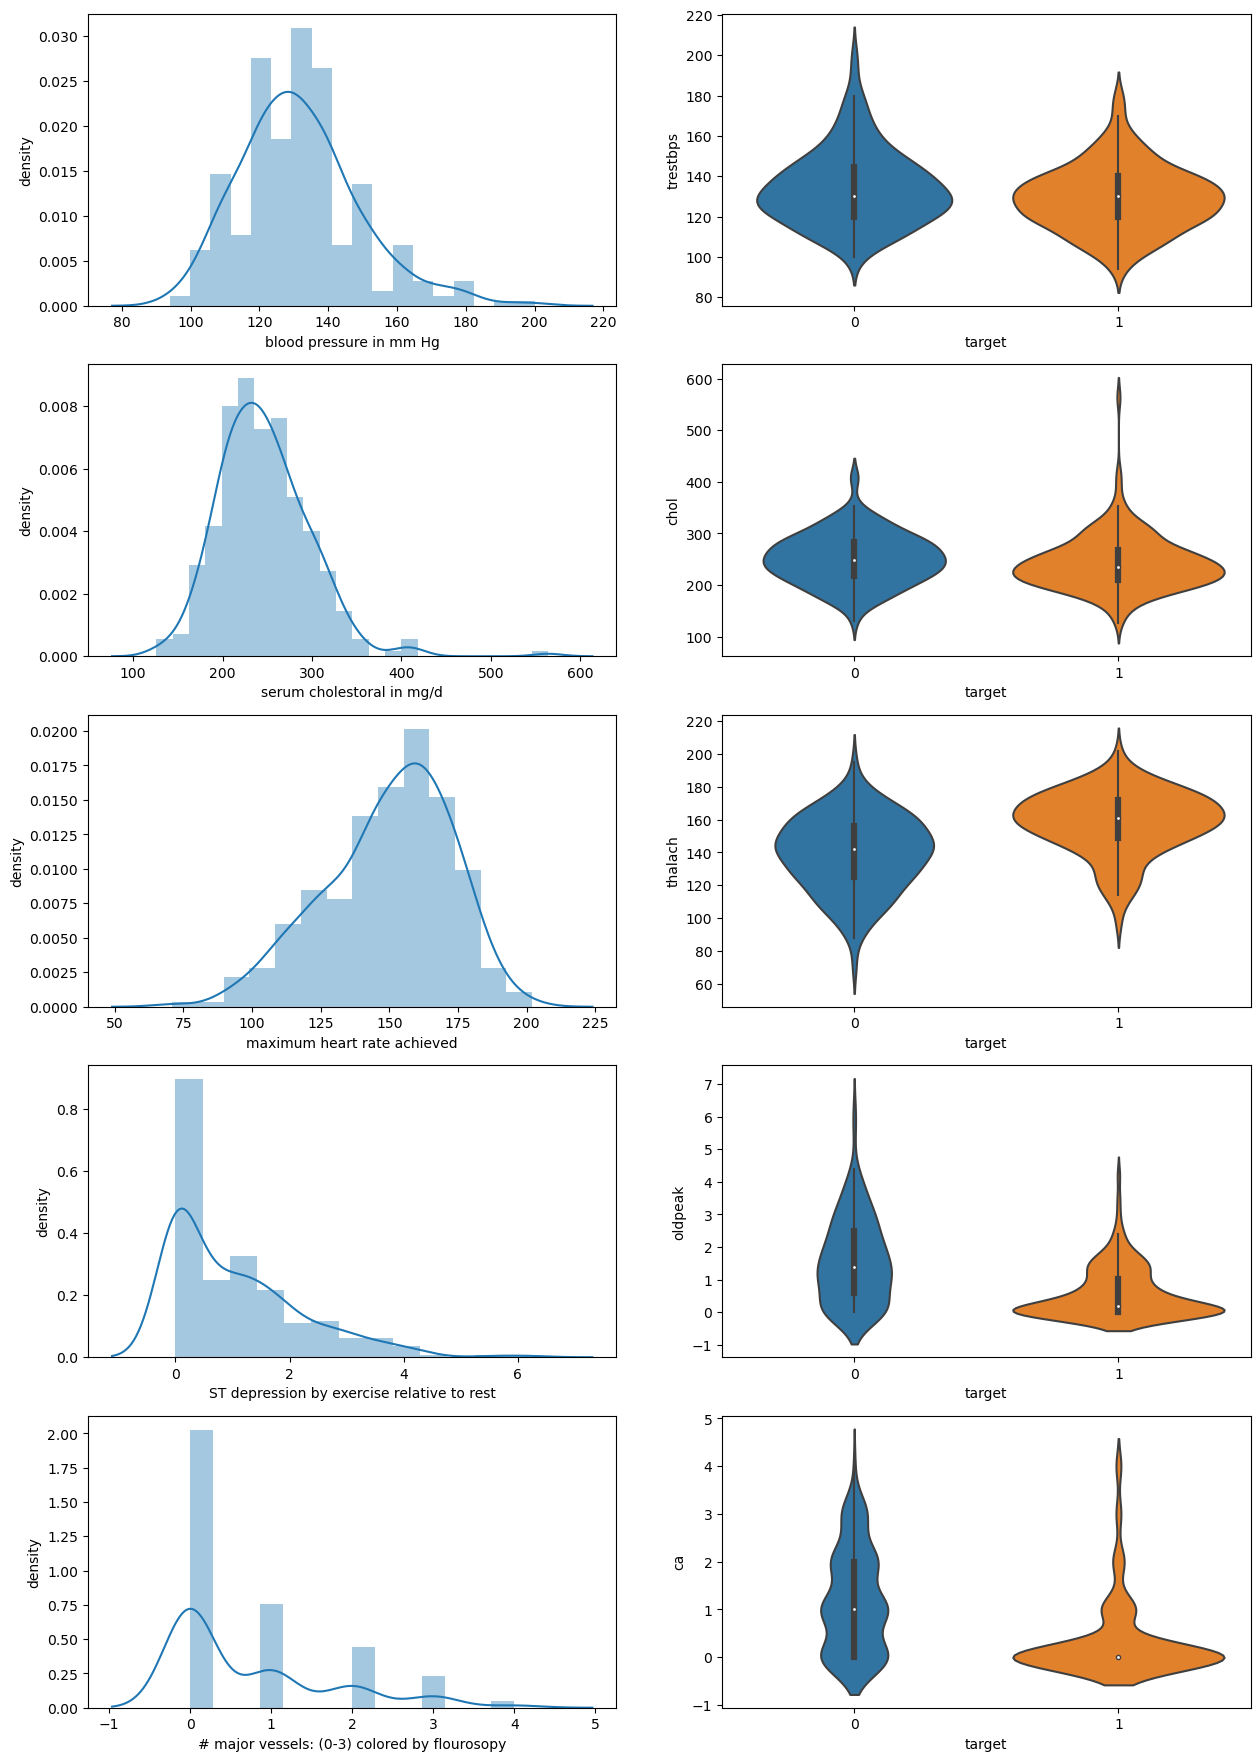

In [37]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 22))

plotGrid(isCategorial=False)

j. Use a pair plot to understand the relationship between all the given variables

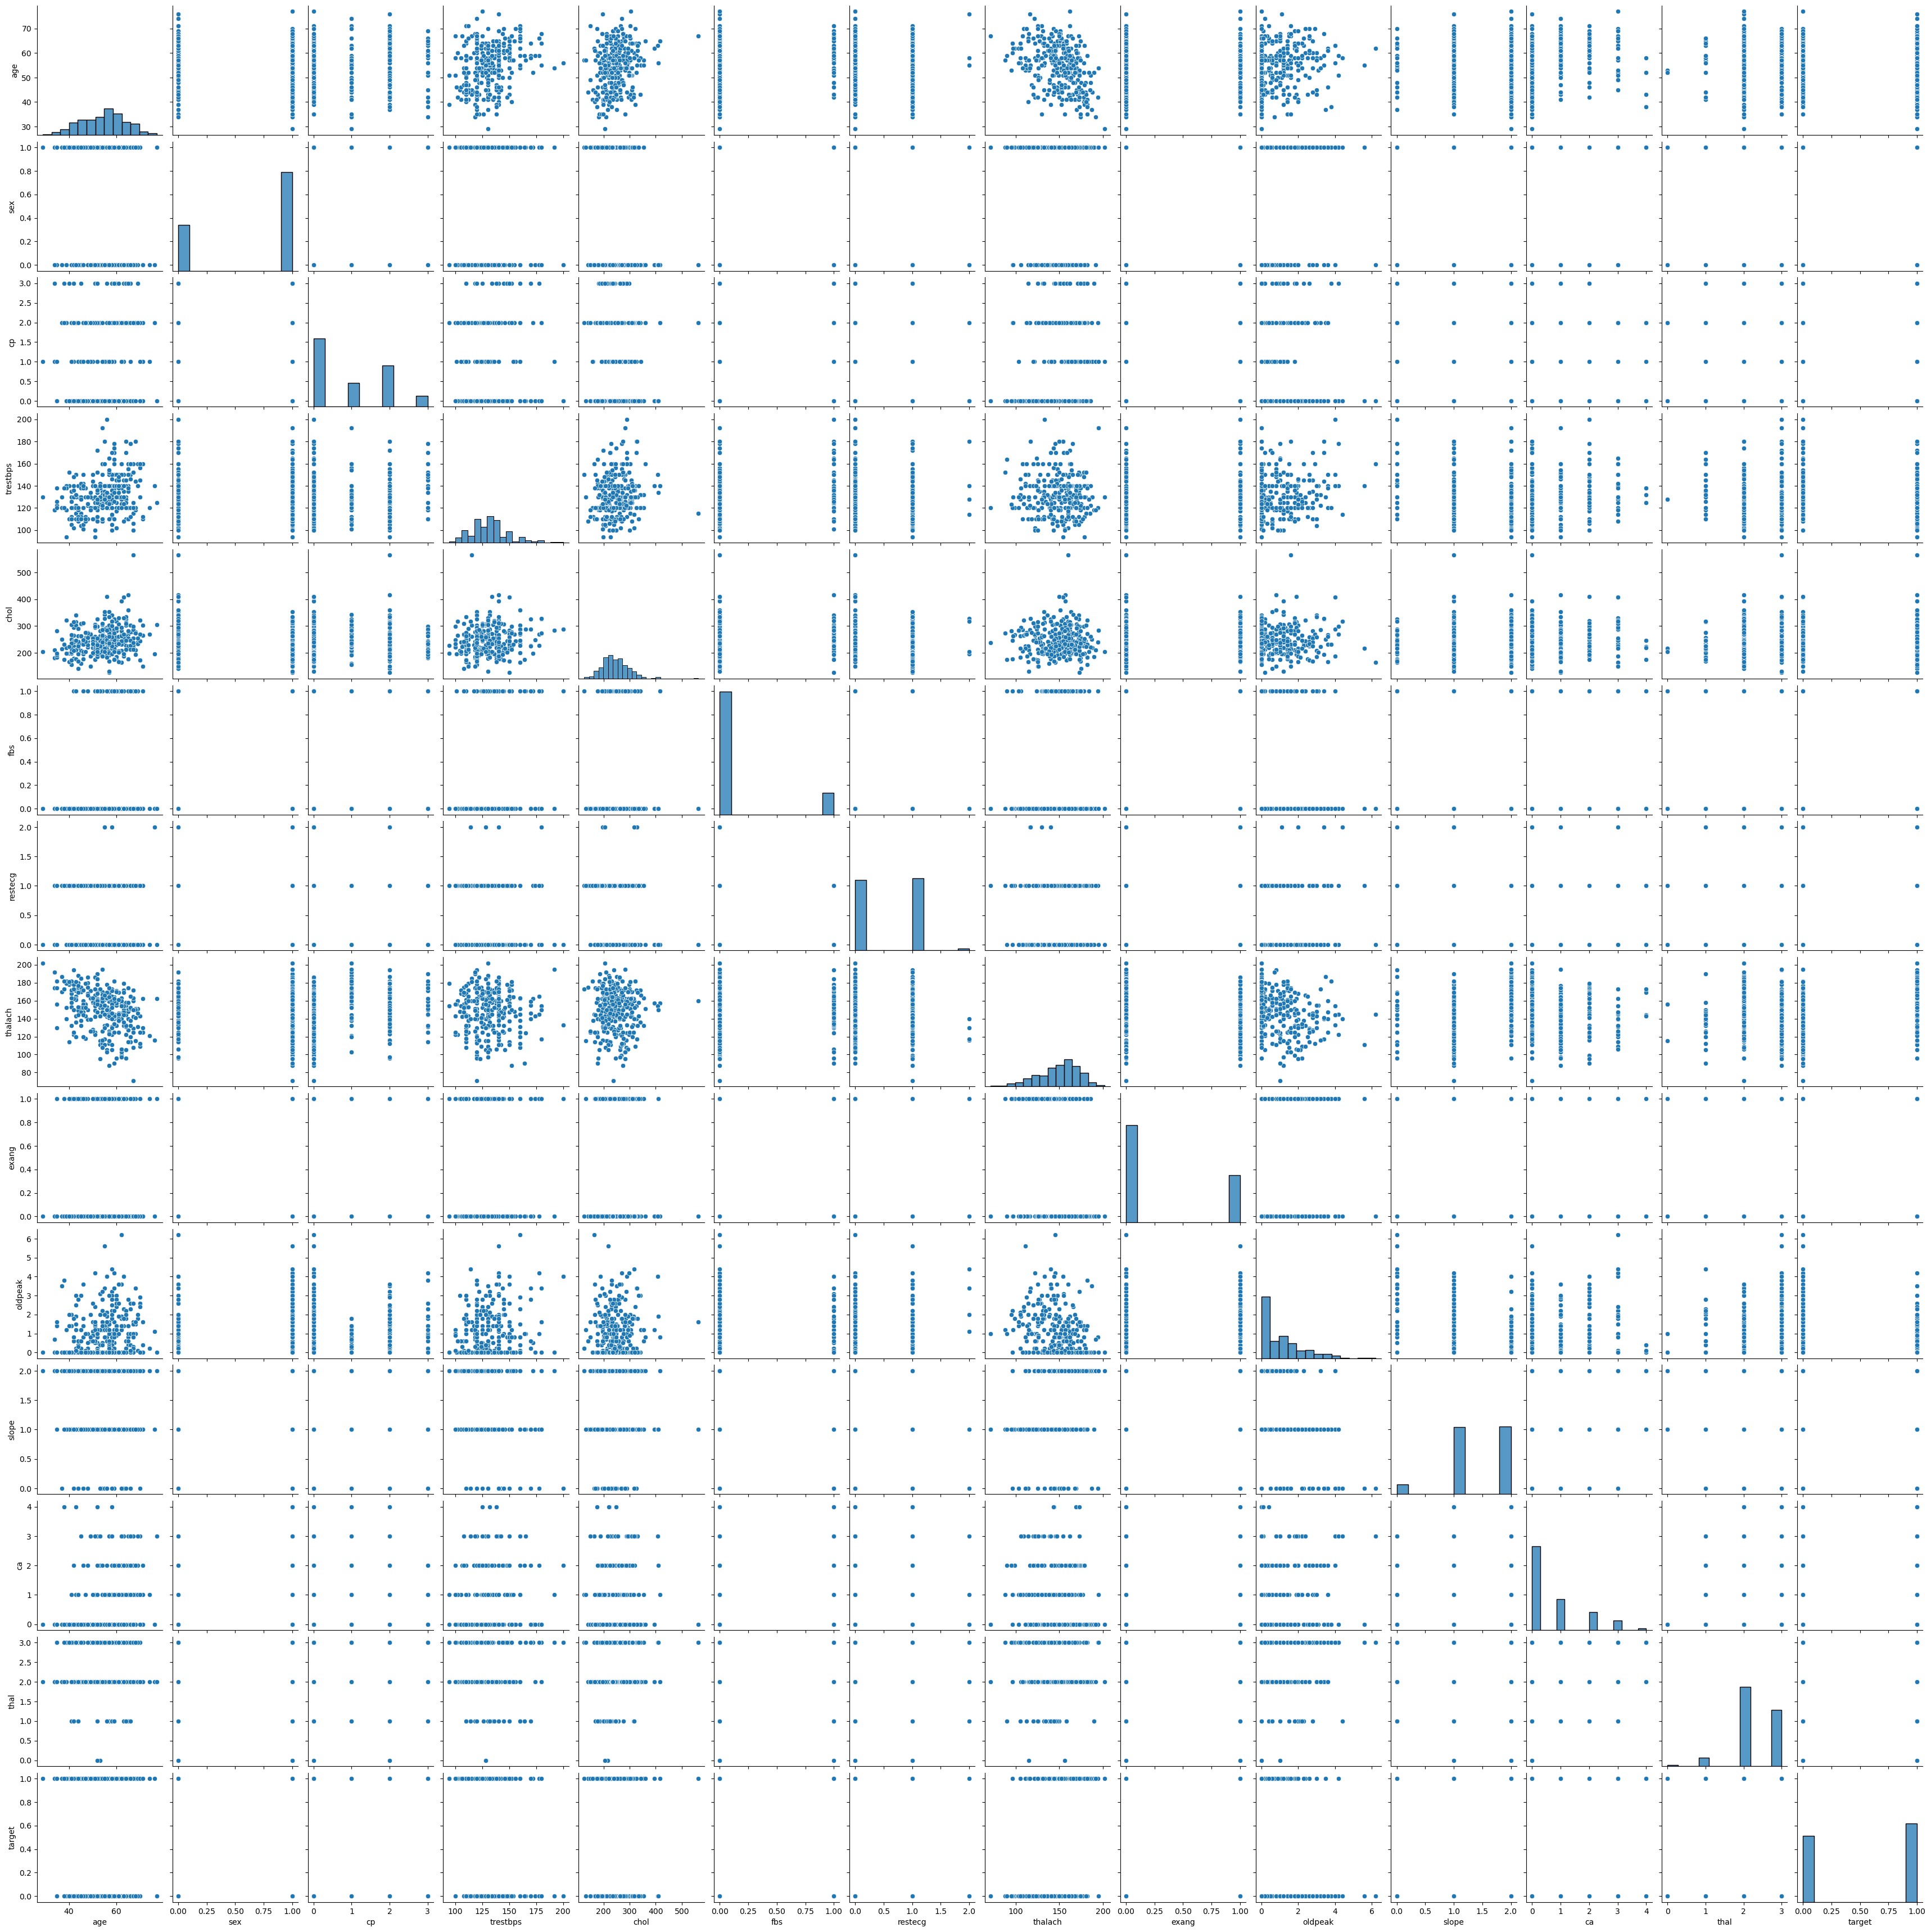

In [38]:
sns.pairplot(data=df)

3. Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

In [39]:
df = df.drop('AgeGroup',axis=1)

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [41]:
predictors= df.drop('target',axis=1)
target=df['target']

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(predictors,target,test_size=0.2,random_state=2022)
#print('Training features have {0} records and Testing features have {1} records.').format((str(X_train.shape[0]),str(X_test.shape[0]))

In [43]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

In [44]:
# Perform GridSearchCV to tune best-fit LR model
param = {'C': [10**-2,10**-1,10**0,10**1,10**2]}

lr_model = LogisticRegression(penalty='l1', solver='liblinear')
gs_model = GridSearchCV(estimator=lr_model, param_grid=param)
gs_model.fit(X_train_std, Y_train)

# Train a LR model with best parameters
model = LogisticRegression(**gs_model.best_params_, penalty='l1', solver='liblinear')
model.fit(X_train_std, Y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [45]:
coef = model.coef_[0]
coef

array([ 0.        , -0.6424599 ,  1.04579677, -0.17159771, -0.16465519,
        0.00825333,  0.2125149 ,  0.36664396, -0.34356478, -0.84307071,
        0.37919977, -0.83857968, -0.48020985])

In [46]:
import numpy as np
coef = model.coef_[0]
imp_features = pd.Series(X_train.columns)[list(coef!=0)]
X_train = X_train[imp_features]
X_test = X_test[imp_features]

In [47]:
X_train.shape

(241, 12)

In [48]:
X_test.shape

(61, 12)

In [49]:
Y_train.shape

(241,)

In [50]:
Y_test.shape

(61,)

In [51]:
from sklearn.metrics import accuracy_score

In [53]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

In [54]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

y_pred_lr = logreg.predict(X_test)
print(y_pred_lr)

[1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1
 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1]


In [55]:
score_lr = round(accuracy_score(y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 80.33 %


In [56]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = train_model(X_train, Y_train, X_test, Y_test, LogisticRegression)

Train accuracy: 87.55%
Test accuracy: 80.33%


In [57]:
#Logistic Regression supports only solvers in ['liblinear', 'newton-cg'<-93.44, 'lbfgs'<-91.8, 'sag'<-72.13, 'saga'<-72.13]
clf = LogisticRegression(random_state=0, solver='newton-cg',multi_class='multinomial').fit(X_test, Y_test)
#The solver for weight optimization.
#'lbfgs' is an optimizer in the family of quasi-Newton methods.
clf.score(X_test, Y_test)

0.9016393442622951

Precision:  0.7837837837837838
Recall is:  0.8787878787878788


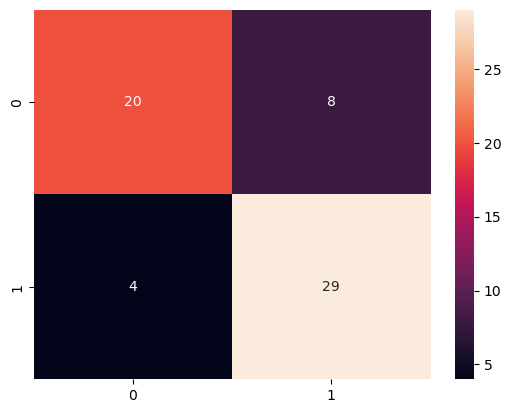

In [58]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

matrix= confusion_matrix(Y_test, y_pred_lr)
sns.heatmap(matrix,annot = True, fmt = "d")
precision = precision_score(Y_test, y_pred_lr)
print("Precision: ",precision)
recall = recall_score(Y_test, y_pred_lr)
print("Recall is: ",recall)

In [59]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(X_train, Y_train)

y_pred_rf = randfor.predict(X_test)
print(y_pred_rf)

[1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1
 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1]


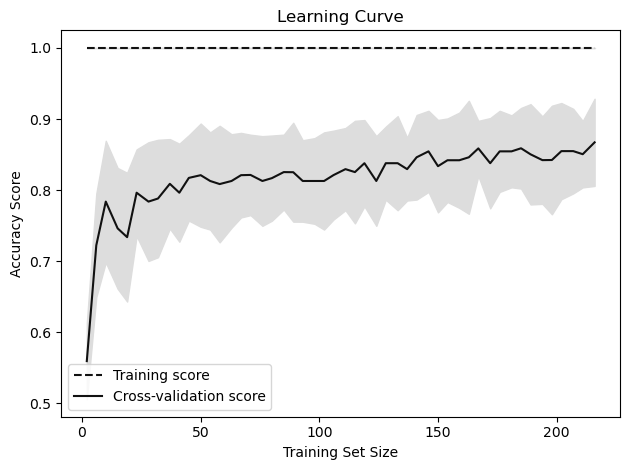

In [60]:
from sklearn.model_selection import learning_curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
                                                        X_train, 
                                                        Y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [61]:
score_rf = round(accuracy_score(y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 78.69 %


In [62]:
#Random forest with 100 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.787


In [63]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, Y_test)))

Accuracy on training set: 0.896
Accuracy on test set: 0.803


Precision:  0.7777777777777778
Recall is:  0.8484848484848485


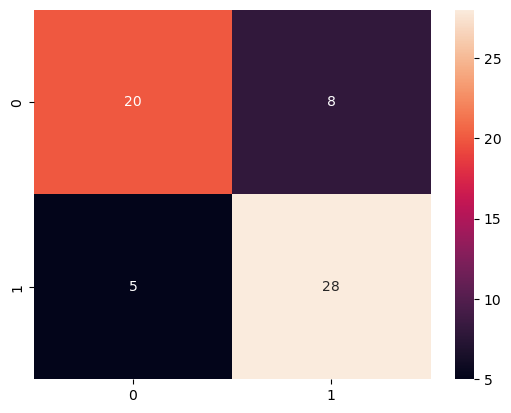

In [64]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

matrix= confusion_matrix(Y_test, y_pred_rf)
sns.heatmap(matrix,annot = True, fmt = "d")
precision = precision_score(Y_test, y_pred_rf)
print("Precision: ",precision)
recall = recall_score(Y_test, y_pred_rf)
print("Recall is: ",recall)